# About thisNotebook

Then i visualized some data, but more plots and bar charts you can see in 'boston-crimes-total'. Description for each visualisation is in "boston-crimes-total" too.

### Content:

1. Import
2. Read data
3. Functions
4. Visualizations

4.1. District

4.2. Total number crime for each year

4.3. Total number crime for each month

4.4. Total number crime for each day of week

4.5. Total number crime for each hour

4.6. SHOOTING

4.6.1. Shooting & year

4.6.2. Shooting & month

4.6.3. Shooting & day of week

4.6.4. Shooting & hour

4.6.5. Shooting & District

# 1. Import

In [2]:
import numpy as np
import pandas as pd

In [3]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
from collections import Counter

# 2. Read data

In [4]:
df = pd.read_csv('boston-crime-data/crime.csv', encoding='latin-1')

In [5]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

# 3. Functions

In [6]:
def visualization_function_for_two_column(
    name_main_column,      # name column with categories
    name_second_column,    # name column for visualization 2 category
    name_first_category,   # first category
    name_second_category): # second category
    
    # select data wich need for visualization
    df_main = df[name_main_column].value_counts()
    df_code_first_category = df[df[name_second_column] == name_first_category][name_main_column].value_counts()
    df_code_second_category = df[df[name_second_column] == name_second_category][name_main_column].value_counts()
    
    #First plot
    trace0 = go.Bar(
        x = df_code_first_category.index,
        y = df_code_first_category.values,
        name = name_main_column
    )
    
    #Second plot
    trace1 = go.Bar(
        x = df_code_second_category.index,
        y = df_code_second_category.values,
        name = name_second_column
    )
    
    #Third plot
    trace2 = go.Bar(
        x = df_main.index,
        y = df_main.values,
        name = "All Category's Distribuition"
    )
    
    #Creating the grid
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=(name_first_category, name_second_category, "General Category's"))

    #setting the figs
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)
    fig.append_trace(trace2, 2, 1)

    fig['layout'].update(showlegend=True, title="Category's Distribuition",bargap=0.05)
    iplot(fig)
    
    return 0

In [7]:
def pie_plot(labels, sizes):
    plt.figure(figsize=(20,10))
    plt.pie(sizes, 
        labels=labels,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0

In [8]:
def bar_chart(list1, list2):
    objects = list1
    y_pos = np.arange(len(objects))
    performance = list2
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

# 4. Visualization

## 4.1. District

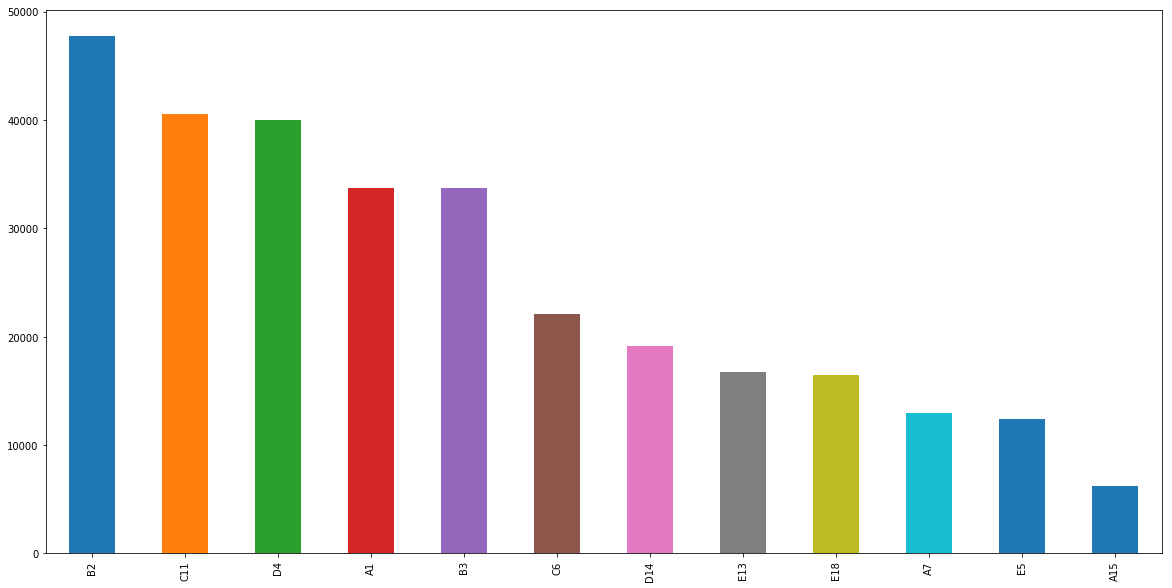

In [9]:
plt.figure(figsize=(20,10))
df['DISTRICT'].value_counts().plot.bar()
plt.show()

## 4.2. Total number crime for each year

In [10]:
y_2015 = len(df.loc[df['YEAR'] == 2015])
y_2016 = len(df.loc[df['YEAR'] == 2016])
y_2017 = len(df.loc[df['YEAR'] == 2017])
y_2018 = len(df.loc[df['YEAR'] == 2018])

labels = '2015', '2016', '2017', '2018'
sizes = [y_2015, y_2016, y_2017, y_2018]

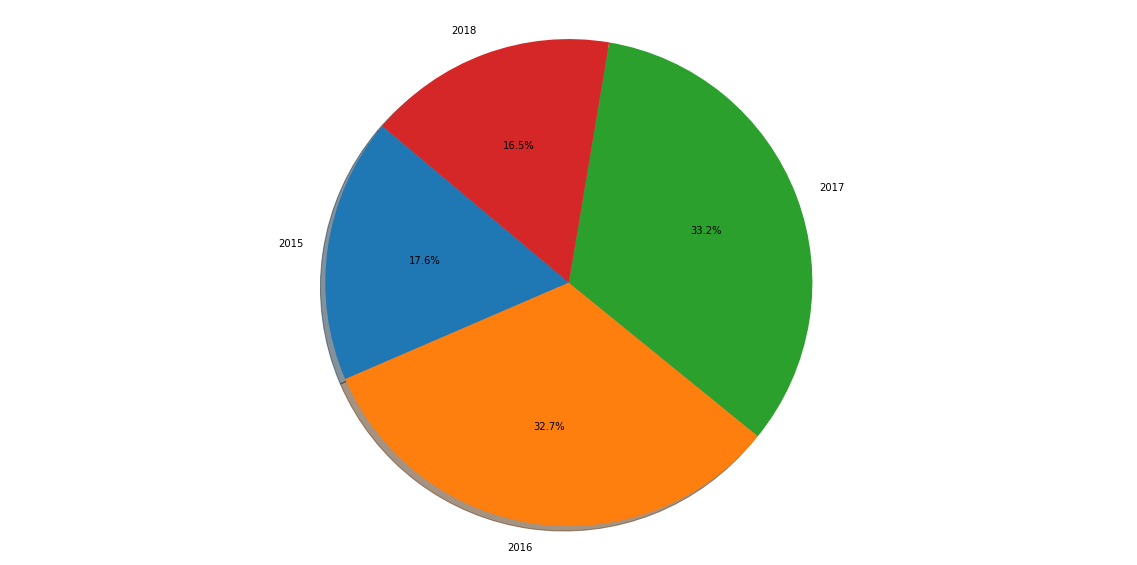

0

In [11]:
pie_plot(labels, sizes)

In [12]:
df['YEAR'].value_counts()

2017    100749
2016     99080
2015     53379
2018     50163
Name: YEAR, dtype: int64

## 4.3. Total number crime for each month

In [13]:
i = 1
list_month = list()

while i <= 12:
    list_month.append(len(df.loc[df['MONTH'] == i]))
    i+=1

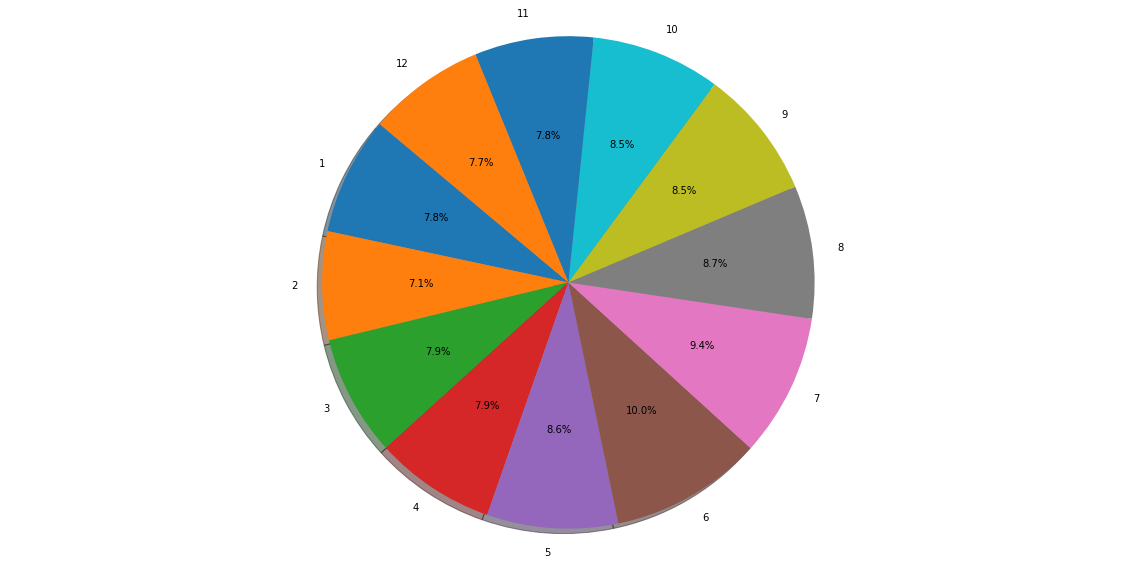

0

In [14]:
pie_plot(list(range(1,13)), list_month)

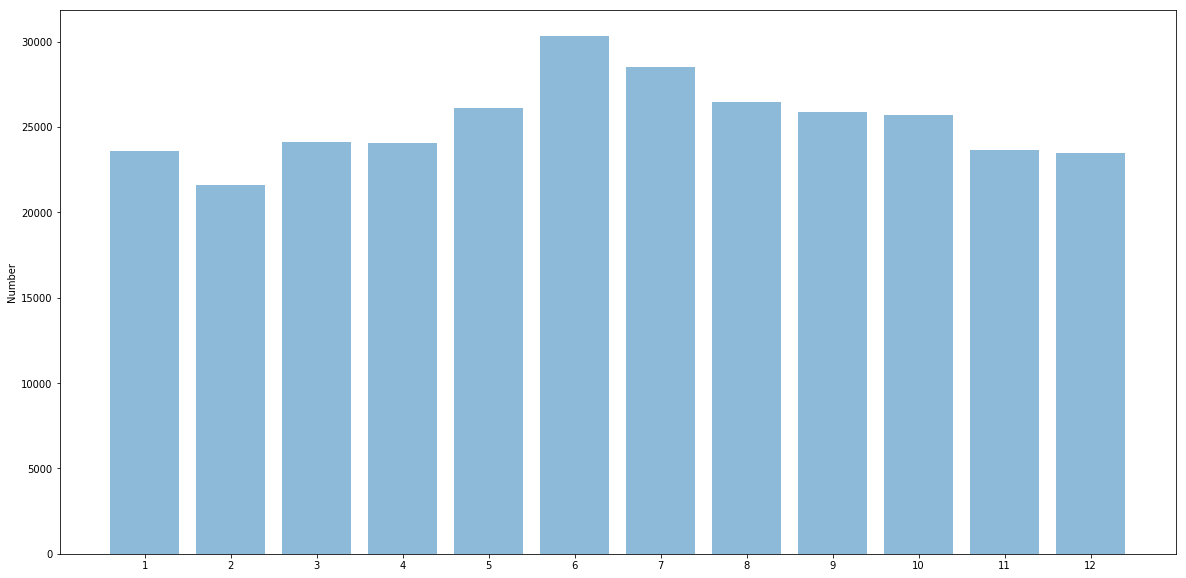

0

In [15]:
bar_chart(list(range(1,13)), list_month)

## 4.4. Total number crime for each day of week

In [16]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

In [17]:
i = 0
day_number = list()

while i < 7:
    day_number.append(len(df.loc[df['DAY_OF_WEEK'] == day_of_week[i]]))
    
    i +=1

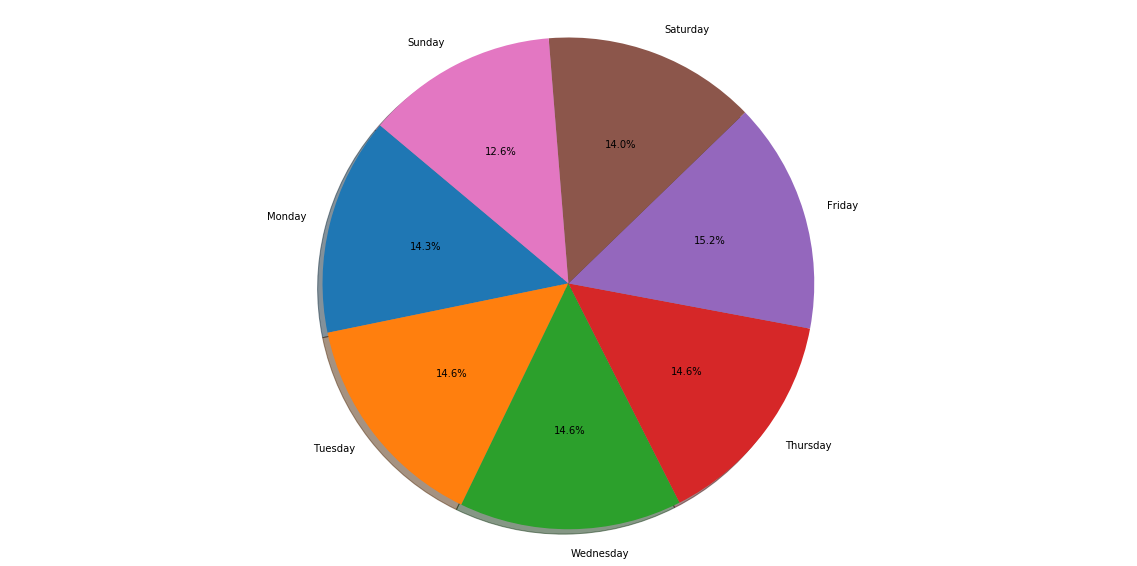

0

In [18]:
pie_plot(day_of_week, day_number)

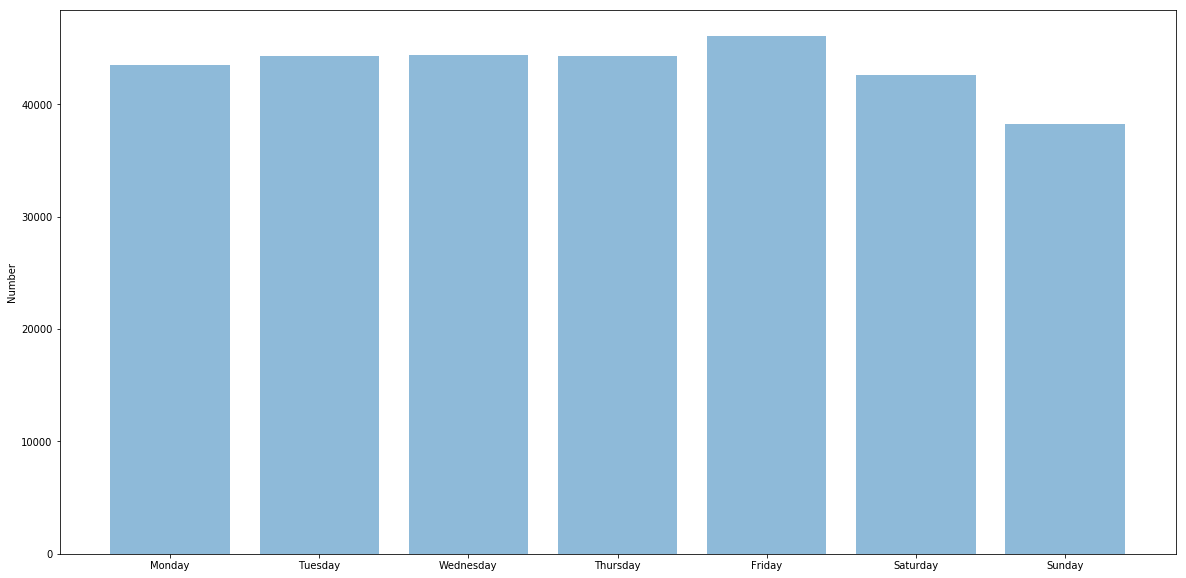

0

In [19]:
bar_chart(day_of_week, day_number)

## 4.5. Total number crime for each hour

In [20]:
df['HOUR'].unique()

array([20, 21, 18, 19, 14,  7,  5, 17, 15, 10, 12, 16, 11,  0,  8, 13,  9,
       23,  2,  1,  6,  3,  4, 22])

In [21]:
i = 0
hour_number = list()

while i < 24:
    hour_number.append(len(df.loc[df['HOUR'] == i]))
    i +=1

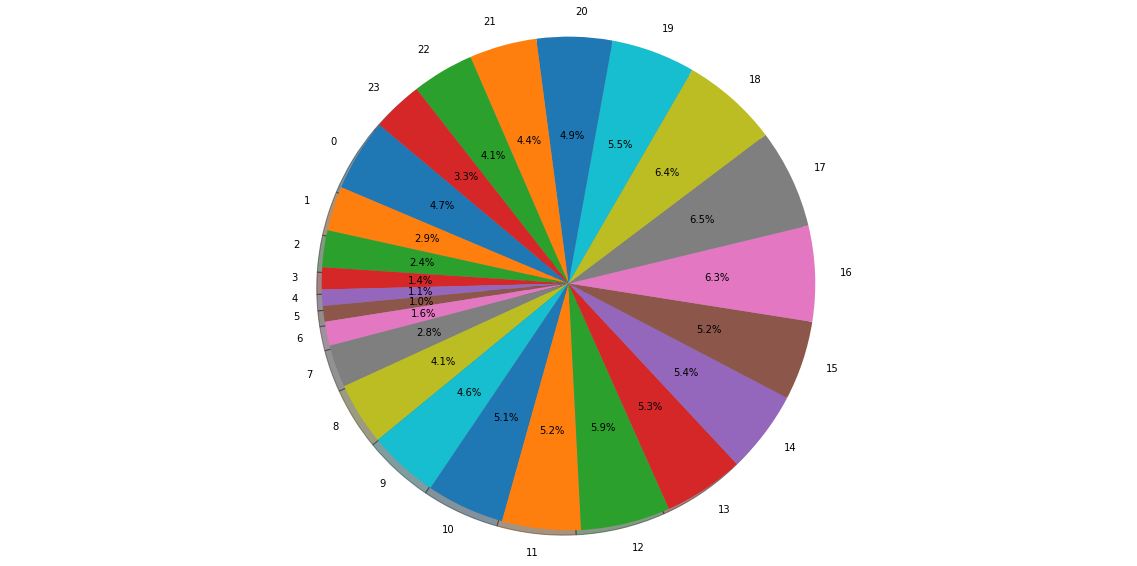

0

In [22]:
pie_plot(list(range(0,24)), hour_number)

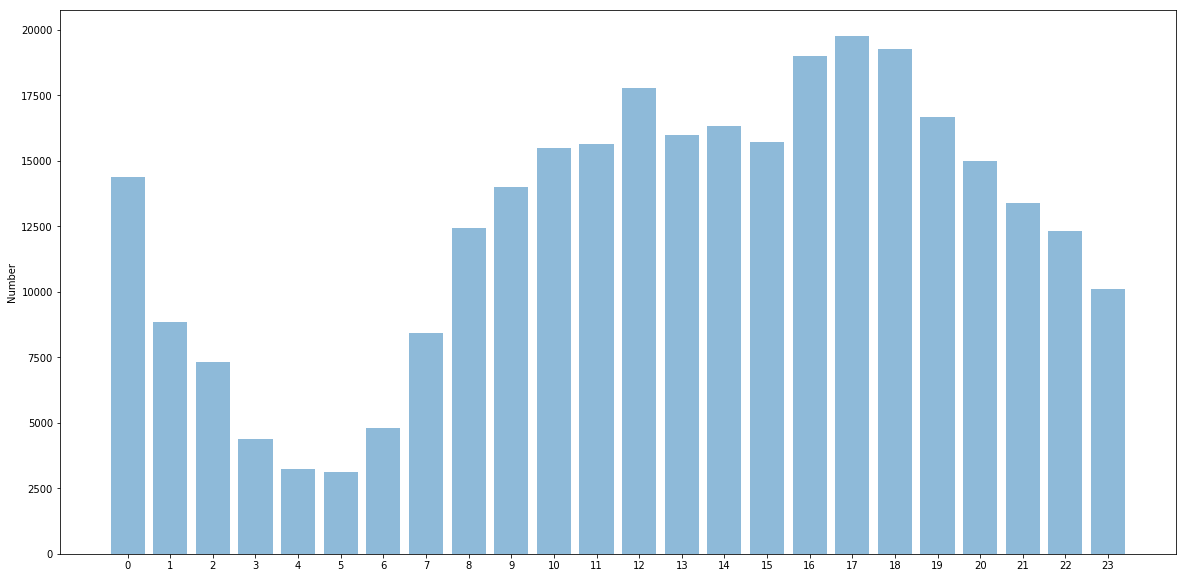

0

In [23]:
bar_chart(list(range(0,24)), hour_number)

## 4.6. SHOOTING

In [24]:
df['SHOOTING'].fillna(0, inplace = True)

df['SHOOTING'] = df['SHOOTING'].map({
    0: 0,
    'Y':1
})

In [25]:
shoot_true = len(df.loc[df['SHOOTING'] == 1])
shoot_false = len(df.loc[df['SHOOTING'] == 0])

In [26]:
print('With shooting(num): ' + str(shoot_true))
print('With shooting(%):   ' + str(round(shoot_true*100/len(df),2))+'%')
print()
print('Without shooting(num): ' + str(shoot_false))
print('Without shooting(%):   ' + str(round(shoot_false*100/len(df),2))+'%')

With shooting(num): 969
With shooting(%):   0.32%

Without shooting(num): 302402
Without shooting(%):   99.68%


In [27]:
df_shoot = df.loc[df['SHOOTING'] == 1]
df_shoot.shape

(969, 17)

### 4.6.1. Shooting & year

In [28]:
y_2015 = len(df_shoot.loc[df_shoot['YEAR'] == 2015])
y_2016 = len(df_shoot.loc[df_shoot['YEAR'] == 2016])
y_2017 = len(df_shoot.loc[df_shoot['YEAR'] == 2017])
y_2018 = len(df_shoot.loc[df_shoot['YEAR'] == 2018])

labels1 = '2015', '2016', '2017', '2018'
sizes2 = [y_2015, y_2016, y_2017, y_2018]

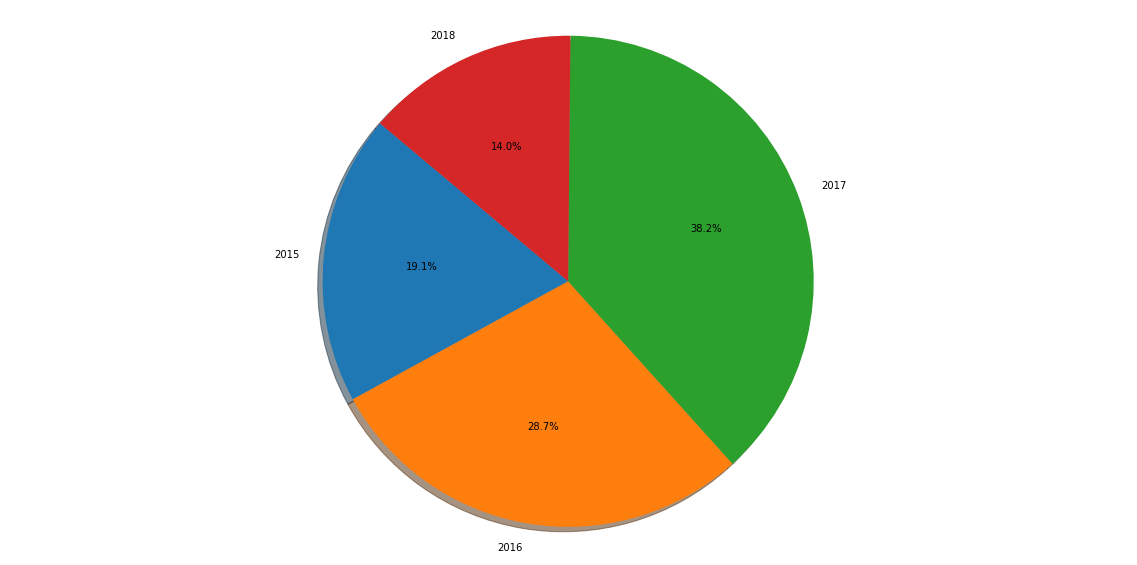

0

In [29]:
pie_plot(labels1, sizes2)

### 4.6.2. Shooting & month

In [30]:
i = 1
list_month = list()

while i <= 12:
    list_month.append(len(df_shoot.loc[df_shoot['MONTH'] == i]))
    i+=1

In [31]:
list_month

[69, 53, 39, 71, 68, 115, 115, 88, 80, 86, 72, 113]

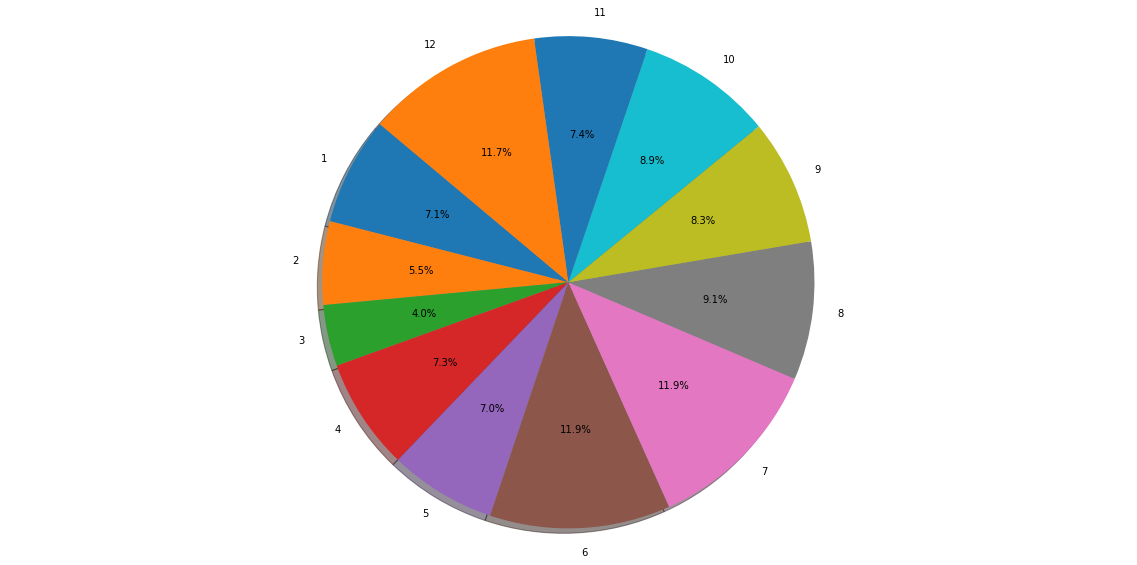

0

In [32]:
pie_plot(list(range(1,13)), list_month)

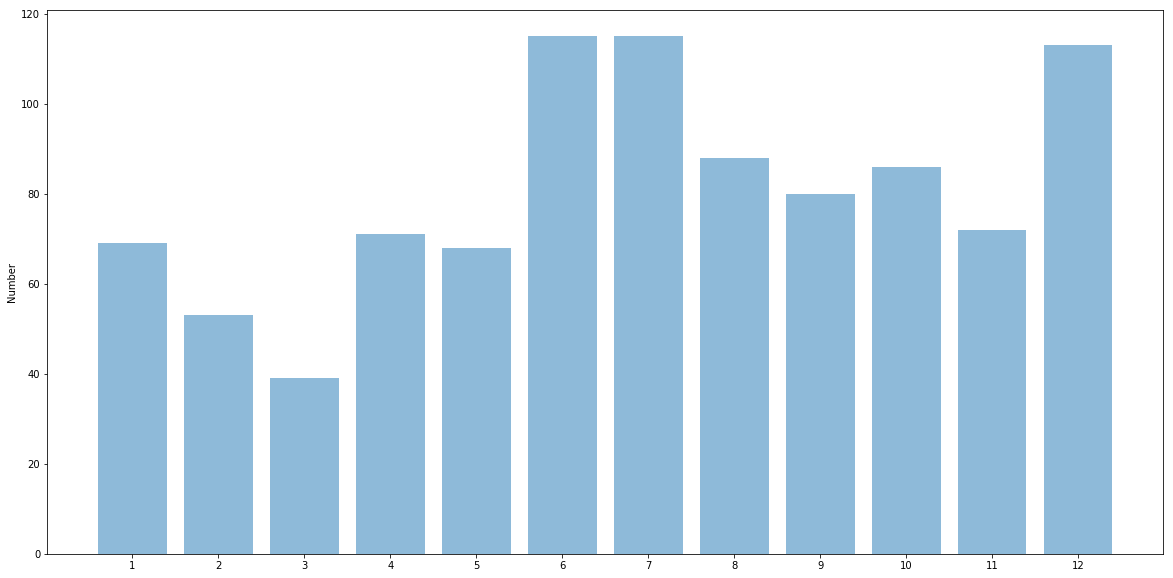

0

In [33]:
bar_chart(list(range(1,13)), list_month)

### 4.6.3. Shooting & day of week

In [34]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

i = 0
day_number = list()

while i < 7:
    day_number.append(len(df_shoot.loc[df_shoot['DAY_OF_WEEK'] == day_of_week[i]]))
    
    i +=1

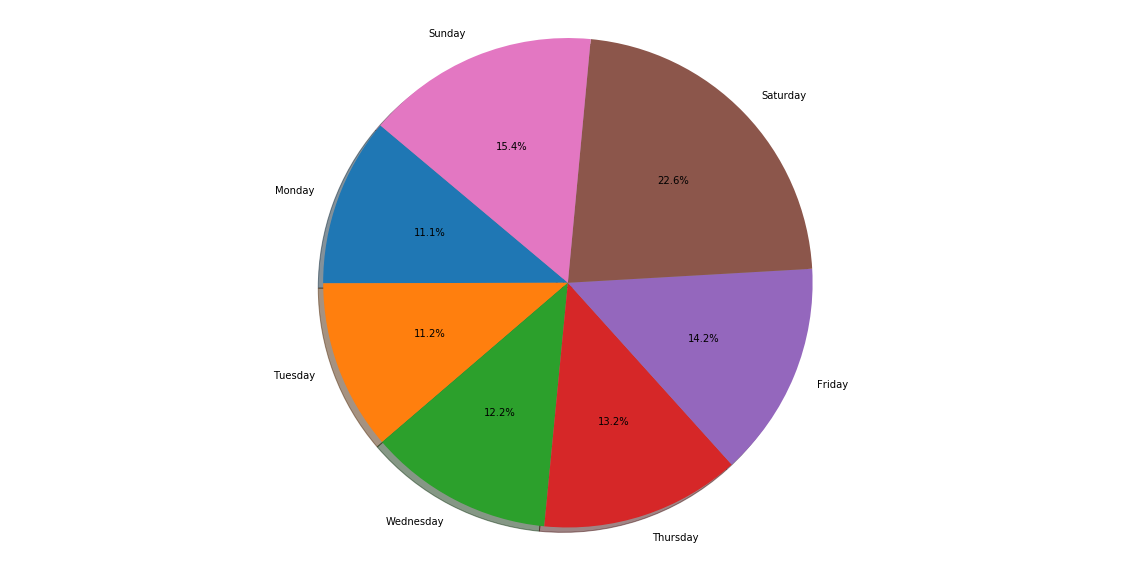

0

In [35]:
pie_plot(day_of_week, day_number)

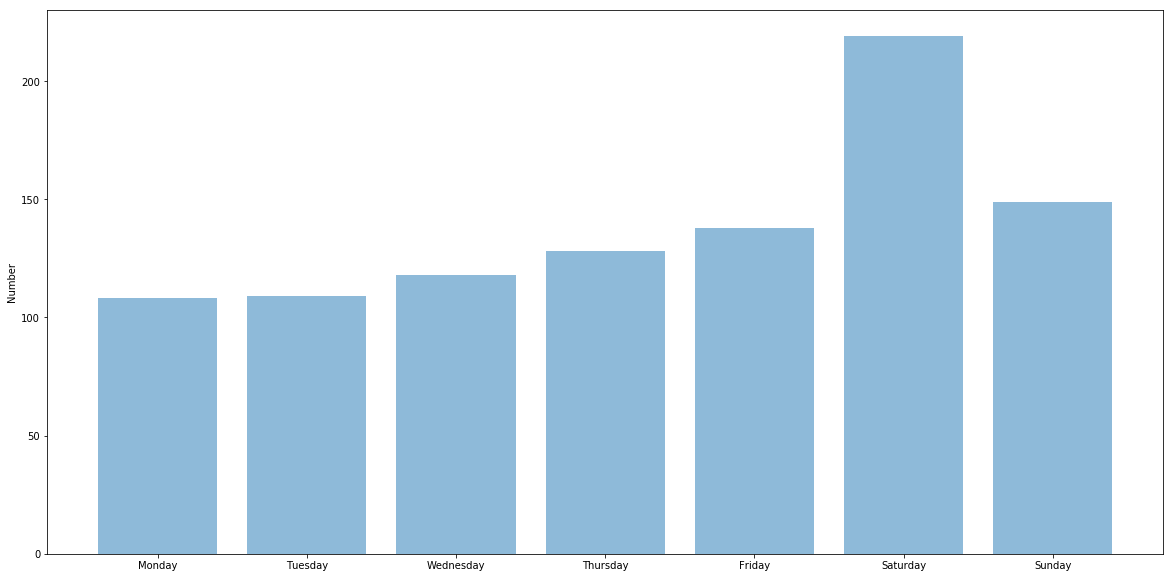

0

In [36]:
bar_chart(day_of_week, day_number)

### 4.6.4. Shooting & hour

In [37]:
i = 0
hour_number = list()

while i < 24:
    hour_number.append(len(df_shoot.loc[df_shoot['HOUR'] == i]))
    i +=1

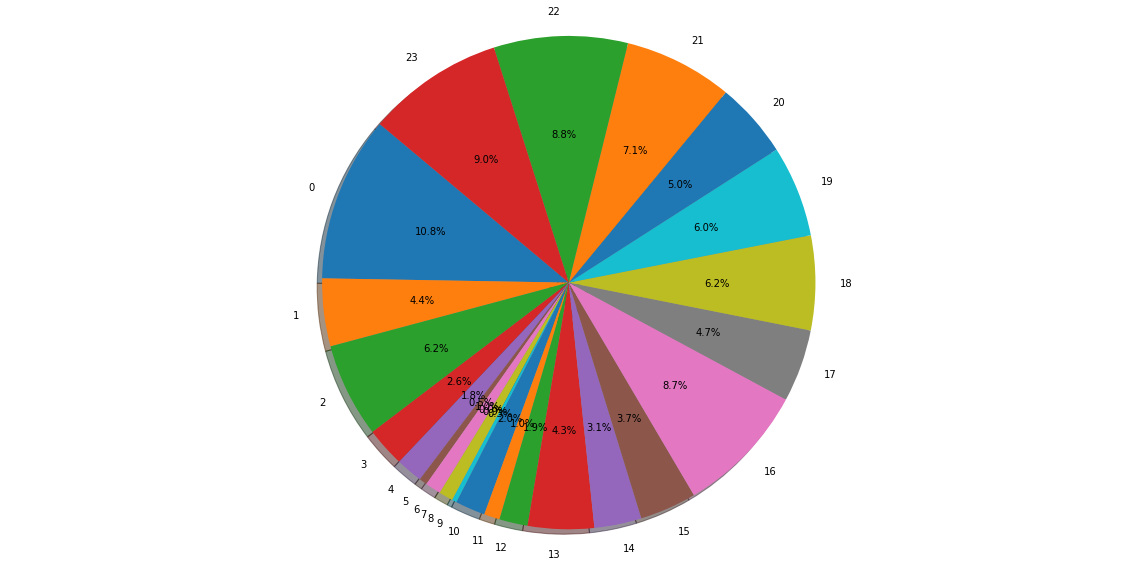

0

In [38]:
pie_plot(list(range(0,24)), hour_number)

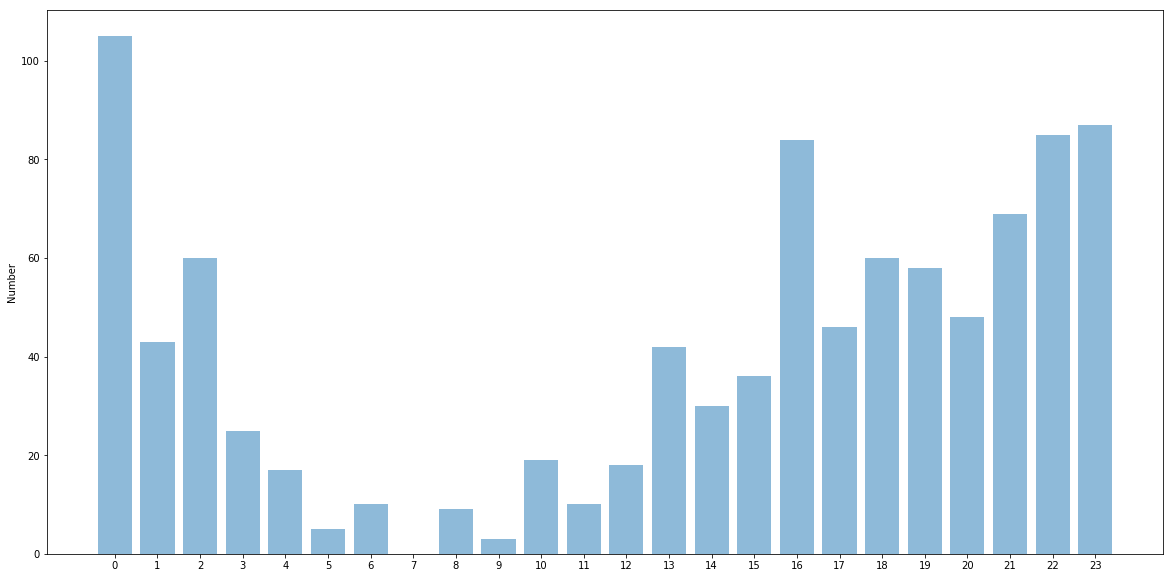

0

In [39]:
bar_chart(list(range(0,24)), hour_number)

### 4.6.5. Shooting & District

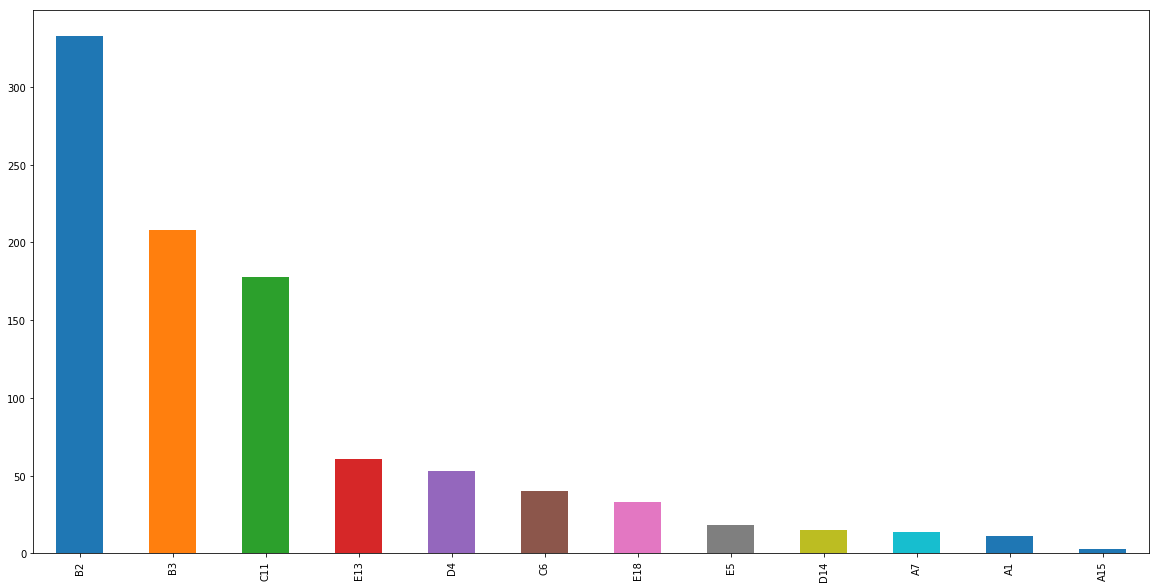

In [40]:
plt.figure(figsize=(20,10))
df_shoot['DISTRICT'].value_counts().plot.bar()
plt.show()